# Mean Field Calculations

GRANAD allows to determine the ground state of a tight-binding system in two ways:

1. A self-consistent charge procedure described in [Kosik et al.](https://www.degruyterbrill.com/document/doi/10.1515/nanoph-2022-0154/html?lang=en)
2. A standard mean field procedure.

We will illustrate the second approach by demonstrating antiferromagnetic (AF) ordering in the 2D Hubbard model.

First, we define the model analogous to the "Materials tutorial".

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from granad import *
from granad._plotting import *

def get_hubbard_flake(U):
    """Constructs a square lattice cut from the 2D hubbard model at half-filling

    Args:
       U : onsite coulomb repulsion for opposite spins    
    """

    t = 1. # nearest-neighbor hopping

    hubbard = (
        Material("Hubbard")
        .lattice_constant(1.0)
        .lattice_basis([
            [1, 0, 0],
            [0, 1, 0],
        ])
        .add_orbital_species("up", s = -1)
        .add_orbital_species("down", s = 1)
        .add_orbital(position=(0, 0), species = "up",  tag = "up")
        .add_orbital(position=(0, 0), species = "down",  tag = "down")   
        .add_interaction(
            "hamiltonian",
            participants=("up", "up"),
            parameters=[0.0, t],
        )
        .add_interaction(
            "hamiltonian",
            participants=("down", "down"),
            parameters=[0.0, t],
        )
        .add_interaction(
            "coulomb",
            participants=("up", "down"),
            parameters=[U]
            )
    )

    flake = hubbard.cut_flake( Rectangle(10, 4) )
    flake.set_open_shell()
    flake.set_electrons(len(flake)//2)
    
    return flake

We consider this open-shell model away from the phase transition, typically associated with values for U >> t 

In [2]:
flake = get_hubbard_flake(U = 1)

We conduct the mean field computation and plot the energies before and after the mean field treatment

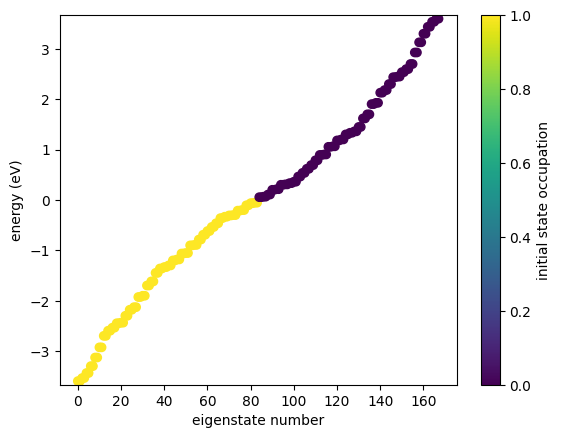

Mean field finished with accuracy 1e-06, iterations 14, yielding final error 3.068564451412026e-07


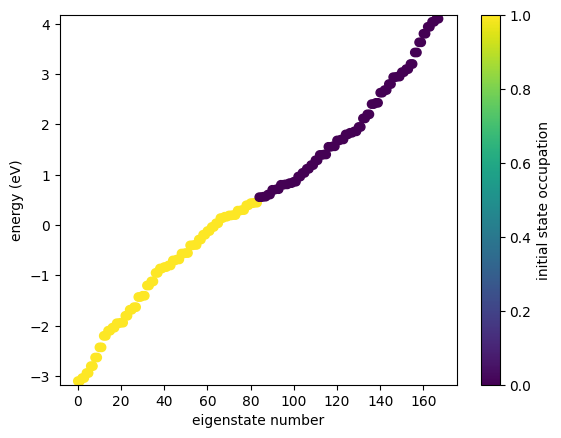

In [3]:
flake.show_energies()
flake.set_mean_field()
flake.show_energies()

No huge qualtiative change is observed, indicating that the ground state of the non-interacting tight-binding model is a serivceable starting point. Tuning U towards larger values presents a different picture

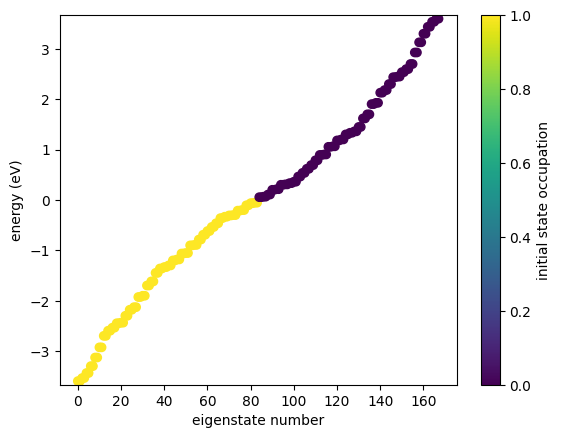

Mean field finished with accuracy 1e-06, iterations 40, yielding final error 4.882819669262804e-07


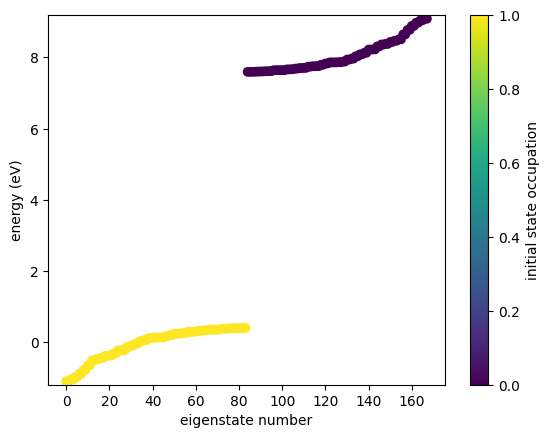

In [4]:
flake = get_hubbard_flake(U = 8)
flake.show_energies()
flake.set_mean_field()
flake.show_energies()

A gapped phase appears. We can demonstrate this to coincide with AF order by visualizing the spin polarization, i.e. the expecation value of spin up minus spin down electrons in the ground state.

In [5]:
def plot_spin_polarization(flake):    
    occs = jnp.diagonal(flake.initial_density_matrix)
    spin_density = occs[:len(flake)//2] - occs[len(flake)//2:]    
    show_2d(flake[:len(flake)//2], display = spin_density * flake.electrons )

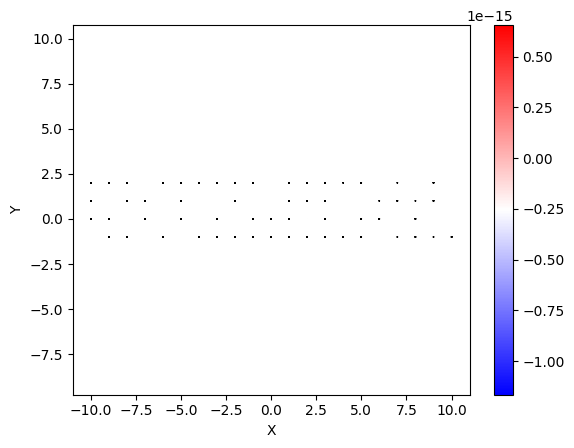

Mean field finished with accuracy 1e-06, iterations 40, yielding final error 4.882819669262804e-07


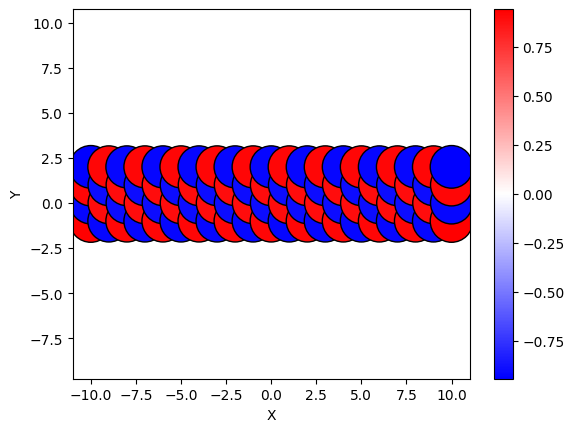

In [6]:
flake = get_hubbard_flake(U = 8)
plot_spin_polarization(flake)
flake.set_mean_field()
plot_spin_polarization(flake)

Clearly, AF ordering is observed.